In [35]:
import requests
import dotenv 
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

dotenv.load_dotenv()

True

In [36]:
OPENWEATHER_API_KEY = os.getenv("OPENWEATHER_API_KEY")

GEOCODE_ENDPOINT = 'http://api.openweathermap.org/geo/1.0/direct'
AIRPOLLUTION_ENDPOINT = 'http://api.openweathermap.org/data/2.5/air_pollution/history'

startDate = '2024-01-01'
startTimeStamp = dt.datetime.strptime(startDate, '%Y-%m-%d').timestamp()
startTimeStamp = int(startTimeStamp)

endTimeStamp = dt.datetime.now().timestamp()
endTimeStamp = int(endTimeStamp)

def getLatLong(city):
    url = f"{GEOCODE_ENDPOINT}?q={city}&limit=1&appid={OPENWEATHER_API_KEY}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data[0]['lat'], data[0]['lon']
    else:
        print("Error: ", response.text)
        return None, None
    
def getAirPollution(lat, lon):
    url = f"{AIRPOLLUTION_ENDPOINT}?lat={lat}&lon={lon}&appid={OPENWEATHER_API_KEY}&start={startTimeStamp}&end={endTimeStamp}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print("Error: ", response.text)
        return None
    

lat, lon = getLatLong("Melbourne")
data = getAirPollution(lat, lon)
print(data)

{'coord': {'lon': 144.9632, 'lat': -37.8142}, 'list': [{'main': {'aqi': 1}, 'components': {'co': 210.29, 'no': 0.39, 'no2': 14.57, 'o3': 11.98, 'so2': 6.56, 'pm2_5': 3.34, 'pm10': 9.89, 'nh3': 1.74}, 'dt': 1704027600}, {'main': {'aqi': 1}, 'components': {'co': 206.95, 'no': 0.47, 'no2': 14.74, 'o3': 10.82, 'so2': 6.97, 'pm2_5': 3.33, 'pm10': 9.66, 'nh3': 1.8}, 'dt': 1704031200}, {'main': {'aqi': 1}, 'components': {'co': 201.94, 'no': 0.52, 'no2': 14.91, 'o3': 9.83, 'so2': 7.39, 'pm2_5': 3.41, 'pm10': 9.49, 'nh3': 1.71}, 'dt': 1704034800}, {'main': {'aqi': 1}, 'components': {'co': 200.27, 'no': 0.95, 'no2': 15.94, 'o3': 6.88, 'so2': 7.87, 'pm2_5': 3.74, 'pm10': 9.52, 'nh3': 1.57}, 'dt': 1704038400}, {'main': {'aqi': 1}, 'components': {'co': 206.95, 'no': 2.71, 'no2': 18.68, 'o3': 2.39, 'so2': 10.25, 'pm2_5': 4.42, 'pm10': 10.07, 'nh3': 2.03}, 'dt': 1704042000}, {'main': {'aqi': 1}, 'components': {'co': 223.64, 'no': 7.82, 'no2': 20.39, 'o3': 0.22, 'so2': 13.83, 'pm2_5': 5.54, 'pm10': 11

In [37]:
lat, lon = getLatLong("Melbourne")
data = getAirPollution(lat, lon)


In [39]:
dates = [dt.datetime.fromtimestamp(item['dt']) for item in data['list']]
components = [item['components'] for item in data['list']]

df = pd.DataFrame(components, index=dates)
df.index = pd.to_datetime(df.index, unit='D', origin='unix')
df.head()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
2024-01-01 00:00:00,210.29,0.39,14.57,11.98,6.56,3.34,9.89,1.74
2024-01-01 01:00:00,206.95,0.47,14.74,10.82,6.97,3.33,9.66,1.80
2024-01-01 02:00:00,201.94,0.52,14.91,9.83,7.39,3.41,9.49,1.71
2024-01-01 03:00:00,200.27,0.95,15.94,6.88,7.87,3.74,9.52,1.57
2024-01-01 04:00:00,206.95,2.71,18.68,2.39,10.25,4.42,10.07,2.03


In [40]:
df_daily_avg = df.resample('D').mean()

In [41]:
df_daily_avg_july = df_daily_avg.loc['2024-06-01':'2024-07-31']

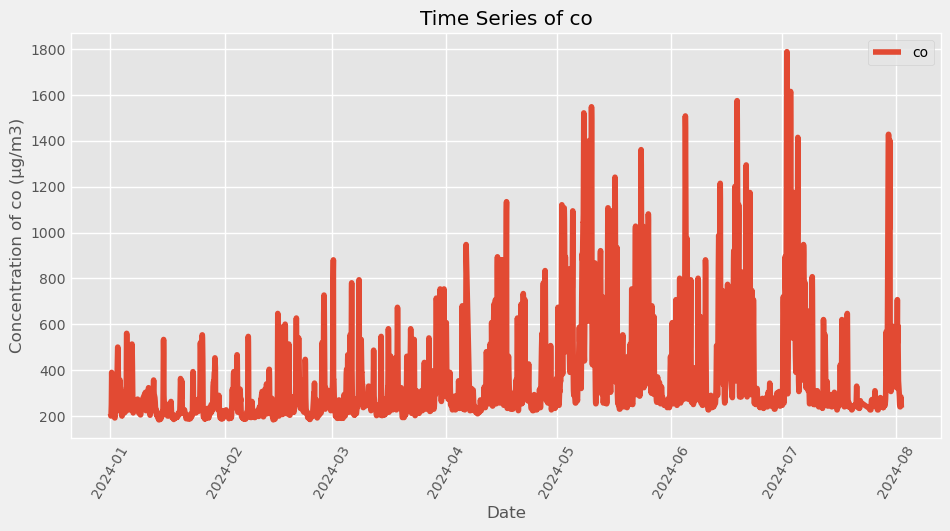

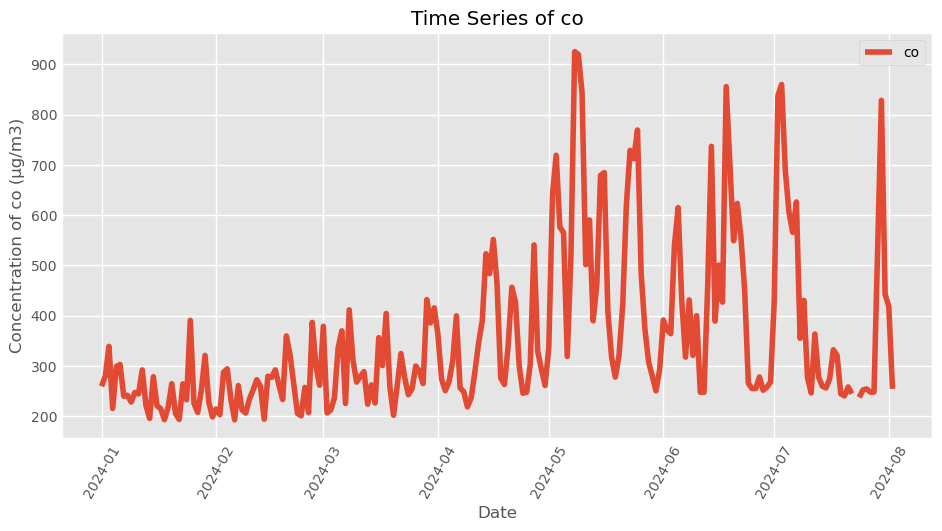

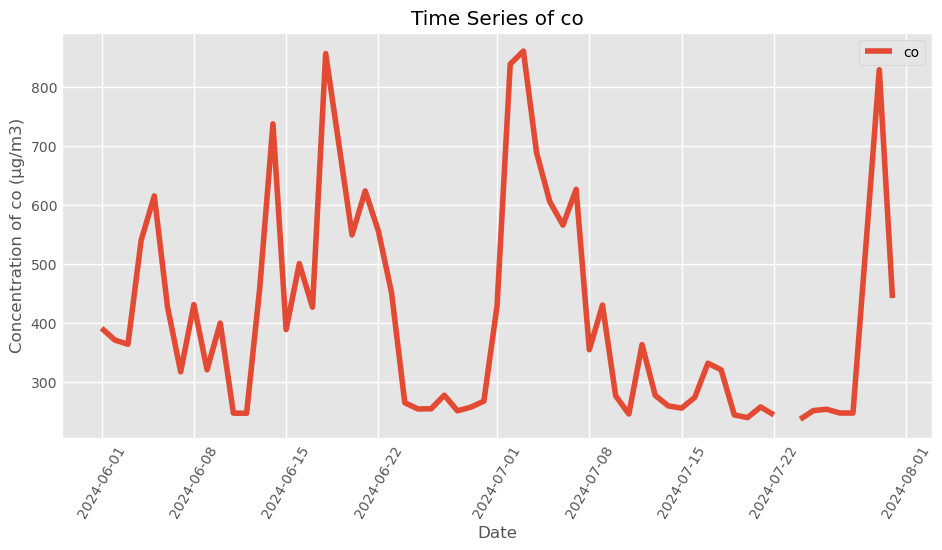

In [42]:
pollution_metrics = df.columns

def plot_metric_time_series (df, metric):
    plt.figure(figsize=(10, 5))
    plt.style.use('ggplot')
    plt.plot(df.index, df[metric], label=metric)
    plt.title(f'Time Series of {metric}')
    plt.xlabel('Date')
    plt.xticks(rotation=60)
    plt.ylabel(f'Concentration of {metric} (μg/m3)')
    plt.legend()
    plt.show()

plot_metric_time_series(df, pollution_metrics[0])
plot_metric_time_series(df_daily_avg, pollution_metrics[0])
plot_metric_time_series(df_daily_avg_july, metric=pollution_metrics[0])